## **Explore domain shift across datasets**
### Investigate the existence of covariate shift in the extracted features from the M2sleep and the BiheartS datasets

### 1. Import essential packages

In [1]:
from sys import path 
path.append("../")
import pandas as pd
from source.models.datasets_management import Datasets
from source.utils.helper_functions import visualize_correlation_heatmap, visualize_correlation_heatmap_per_participant
import seaborn as sns
seed = 42


### 2. Read the two datasets

In [6]:
contextual_features_list  = ["awakening", "sleep_duration_hrs", "slept_before_midnight", "wake_up_before_midday"]
hr_features_list = ["hr_mean","hr_standard_deviation", "hr_standard_error", "hr_maximum", "hr_minimum", "hr_median", "hr_variance", "hr_quantile","hr_dc_component", "hr_sum_spectral_coeffs", "hr_entropy", "hr_energy",]
temp_features_list = ["TEMP_mean", "TEMP_standard_deviation", "TEMP_standard_error",  "TEMP_maximum", "TEMP_minimum", "TEMP_median", "TEMP_variance", "TEMP_quantile", "TEMP_dc_component", "TEMP_sum_spectral_coeffs", "TEMP_entropy", "TEMP_energy"]
acc_features_list = ["ACC_mean", "ACC_standard_deviation", "ACC_standard_error", "ACC_maximum", "ACC_minimum", "ACC_median", "ACC_variance", "ACC_quantile", "ACC_dc_component",  "ACC_sum_spectral_coeffs", "ACC_entropy", "ACC_energy",]
hrv_features_list = ["Mean_NNI",  "SDNN", "SDSD", "NN50", "pNN50", "NN20", "pNN20", "RMSSD", "Median_NN", "Range_NN", "CVSD", "CV_NNI", "LF", "HF", "VLF", "LH_HF_ratio", "LFnu", "HFnu", "Total_Power"]
labels_list = ["sleep_quality", "sleep_quality_binary"]

features_list = contextual_features_list + hr_features_list + temp_features_list + acc_features_list + hrv_features_list
datasets = Datasets(contextual_features_list = contextual_features_list,
                    hr_features_list = hr_features_list,
                    temp_features_list = temp_features_list,
                    acc_features_list = acc_features_list,
                    hrv_features_list = hrv_features_list, 
                    labels_list = labels_list,
                    BiheartS_dataset_path = "../Data2/extracted_features_BiheartS.csv",
                    M2sleep_dataset_path= "../Data2/extracted_features_M2sleep.csv",
                    datasets_names = ["BiheartS", "M2sleep"])

M2sleepDataset = datasets.M2sleep_dataset
BiheartSDataset = datasets.Bihearts_dataset

### 3. Visualize the distribution of each feature across the two datasets


awakening 5.21016291207029e-21


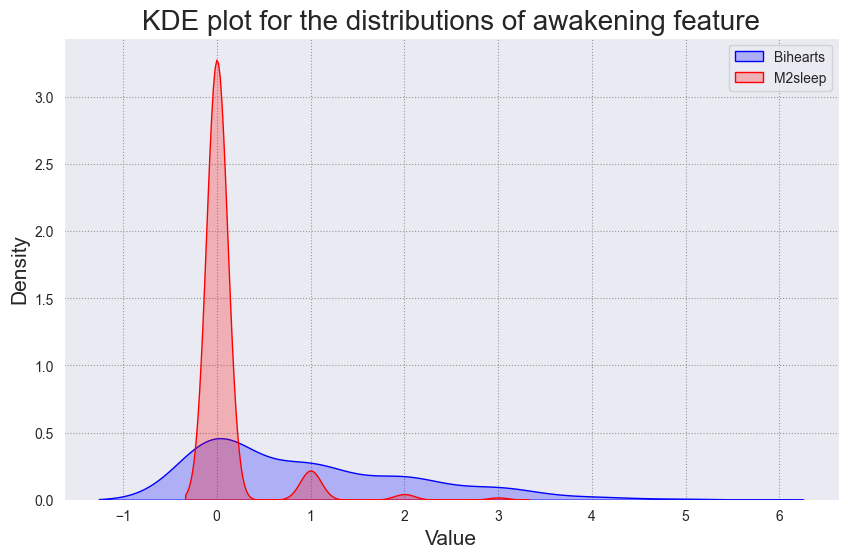

sleep_duration_hrs 0.9779648830208146


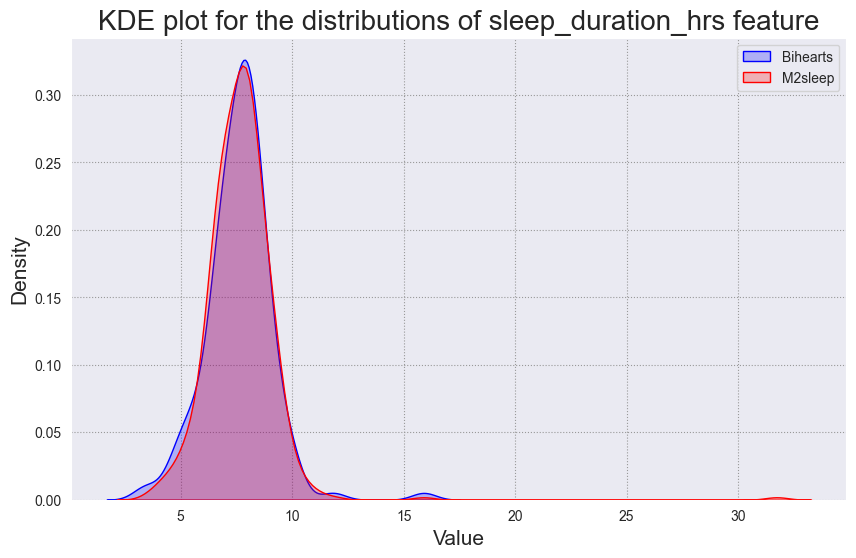

slept_before_midnight 0.0006049591976287738


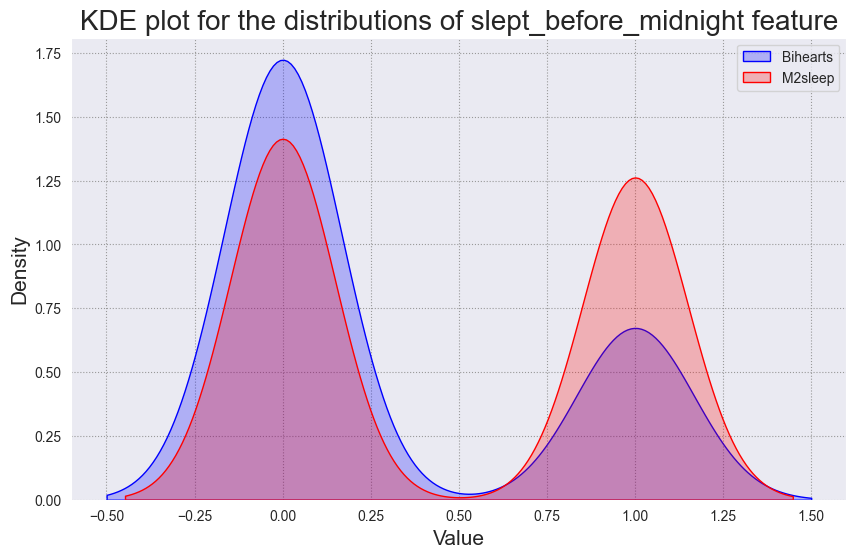

wake_up_before_midday 1.0


/var/folders/0w/m9ywg4y13vggm4ntw4lgt_sc0000gn/T/ipykernel_82854/3535464121.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data3, color='red', label='M2sleep', fill=True)


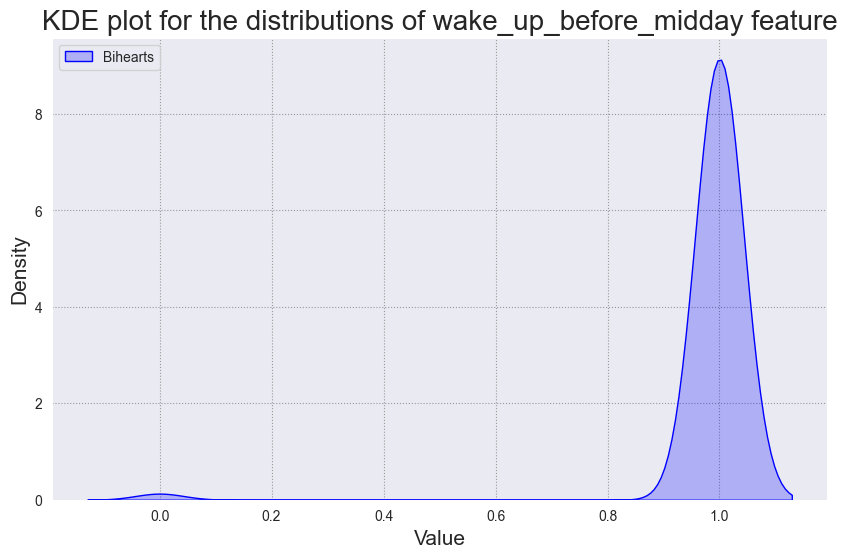

hr_mean 7.371236541764658e-09


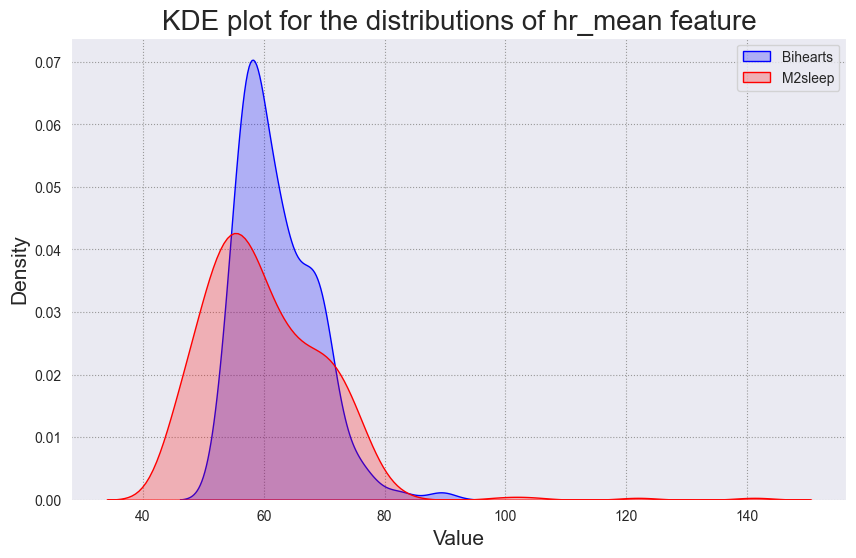

hr_standard_deviation 0.0057791537895178794


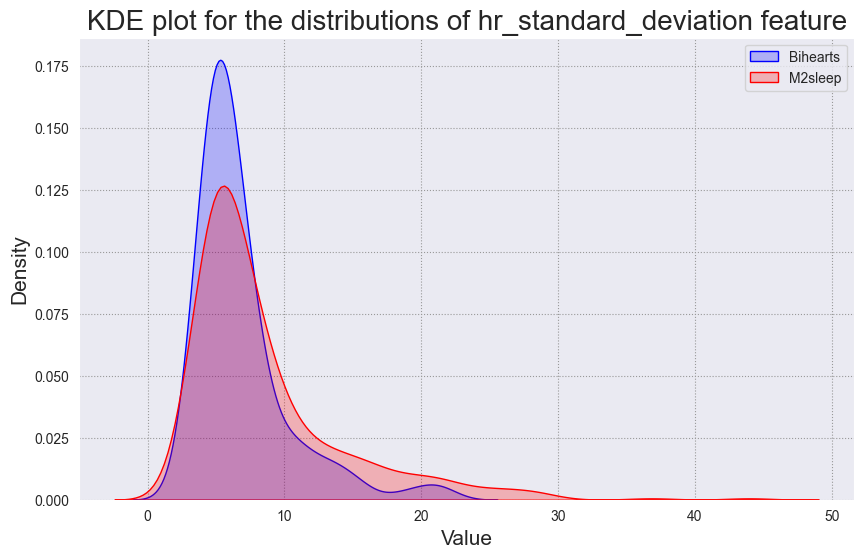

hr_standard_error 0.019228260427782716


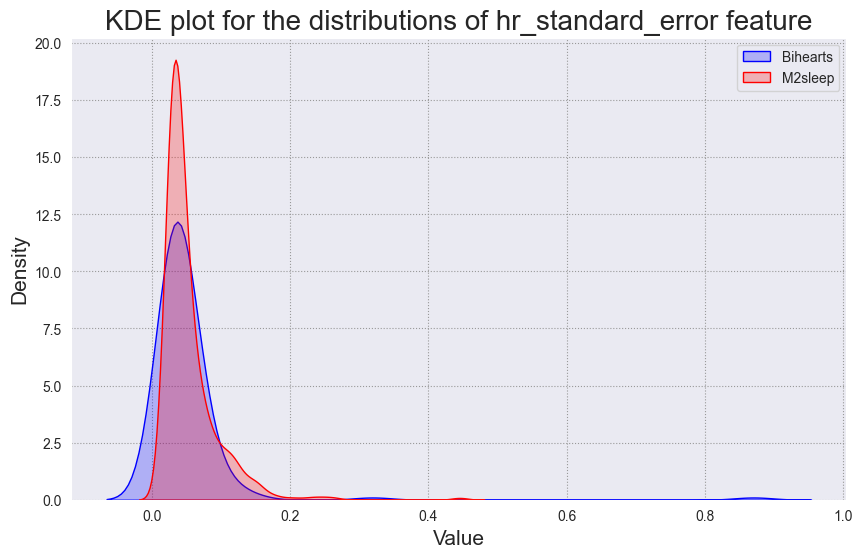

hr_maximum 0.679543888011824


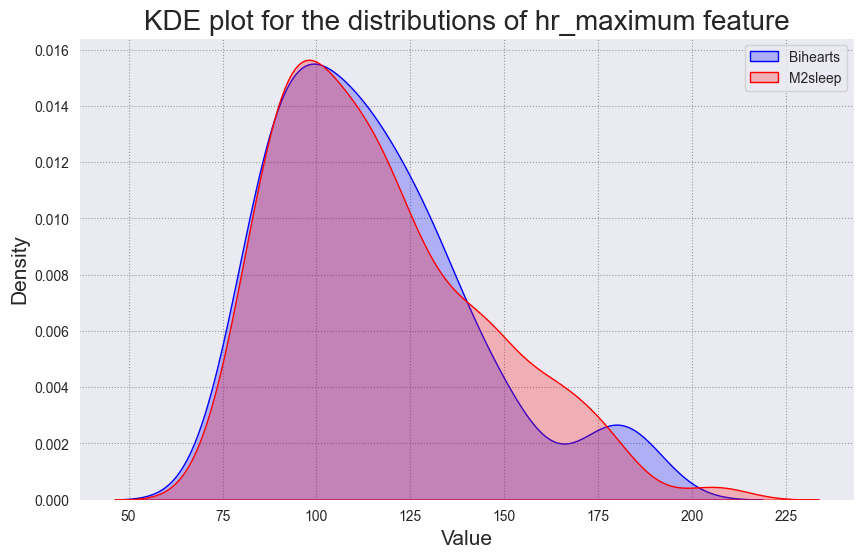

hr_minimum 2.1233078485533783e-10


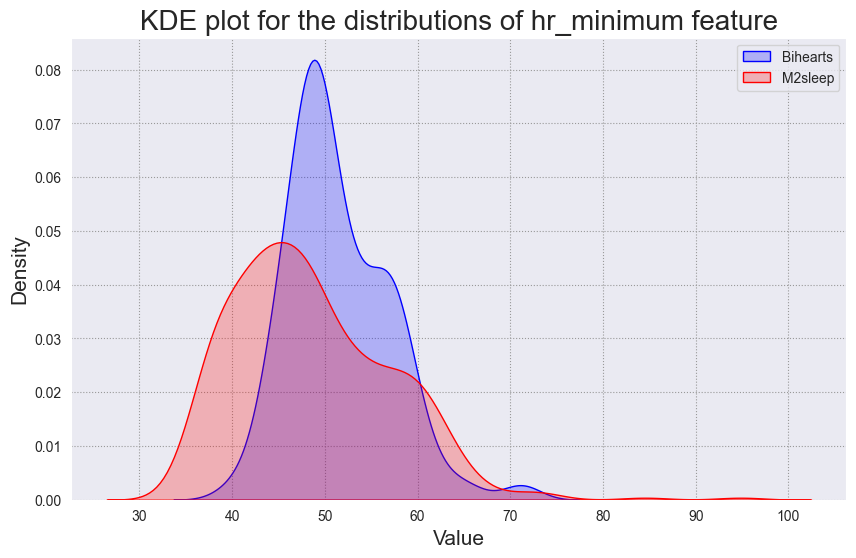

hr_median 4.870708080162985e-12


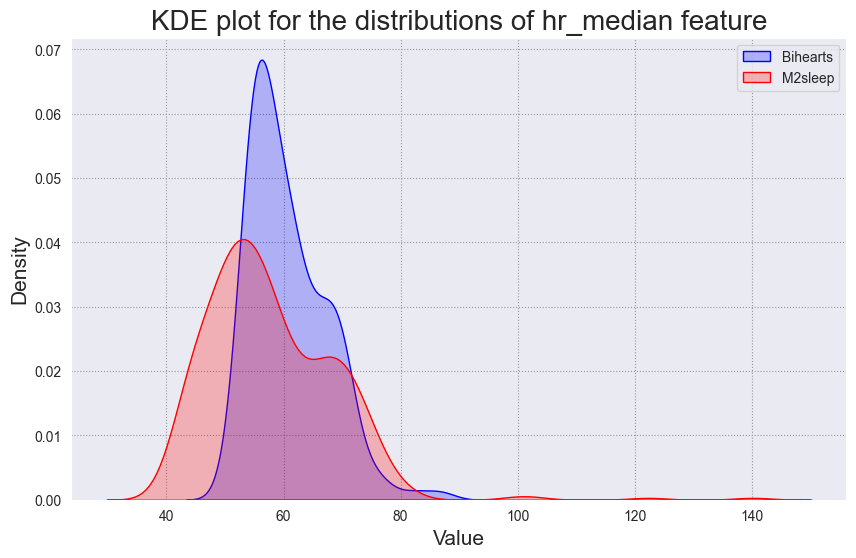

hr_variance 0.0057791537895178794


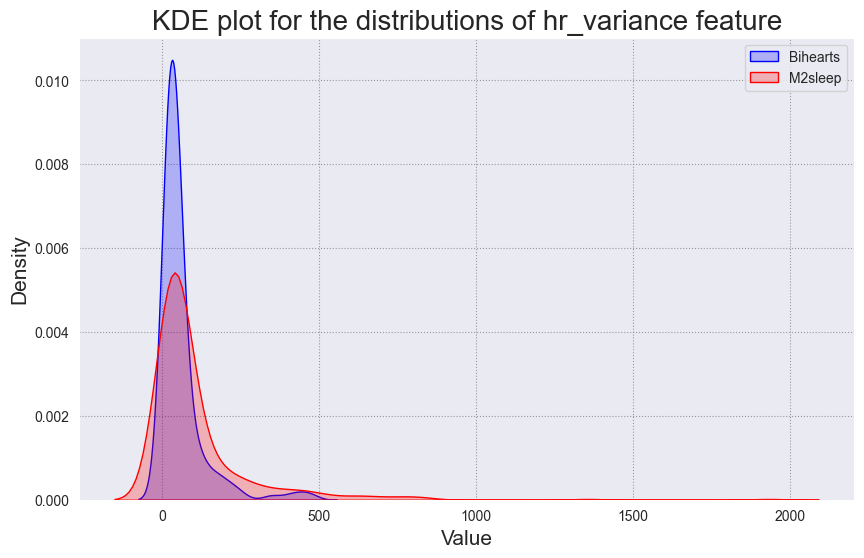

hr_quantile 6.150621174049224e-10


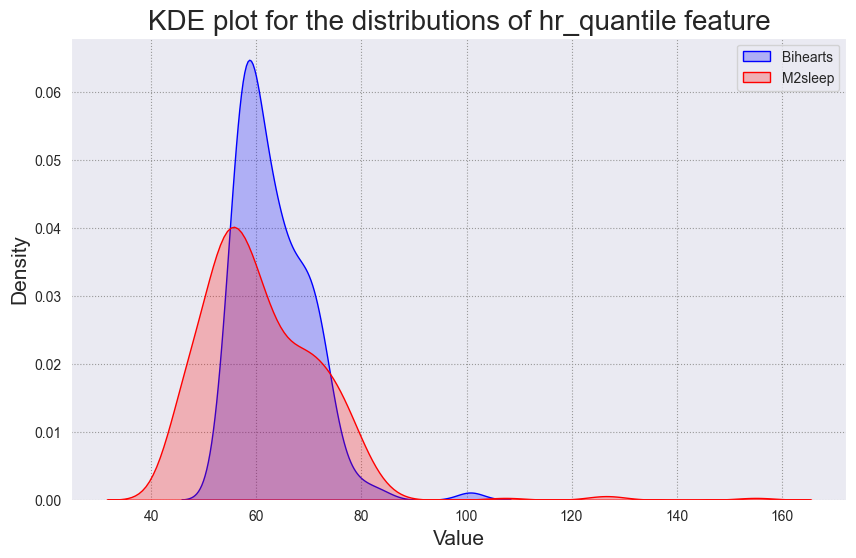

hr_dc_component 0.30940303225955906


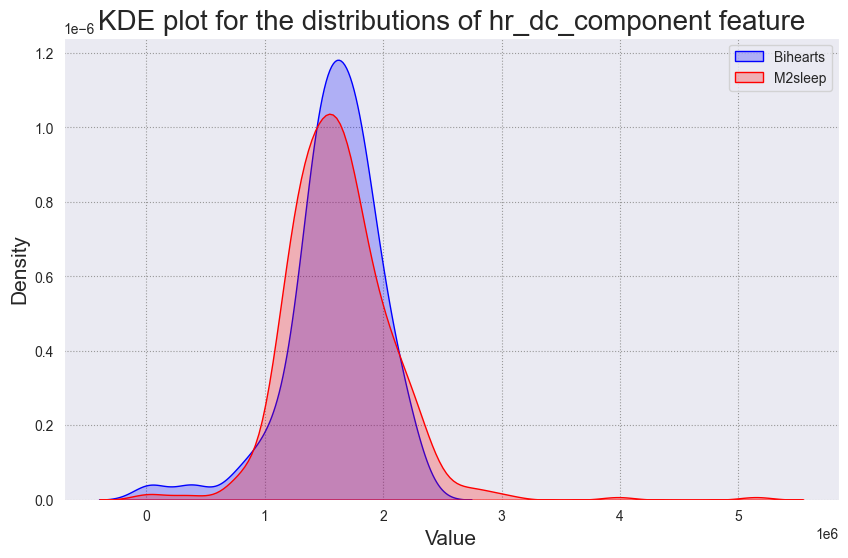

hr_sum_spectral_coeffs 0.0033670730130369816


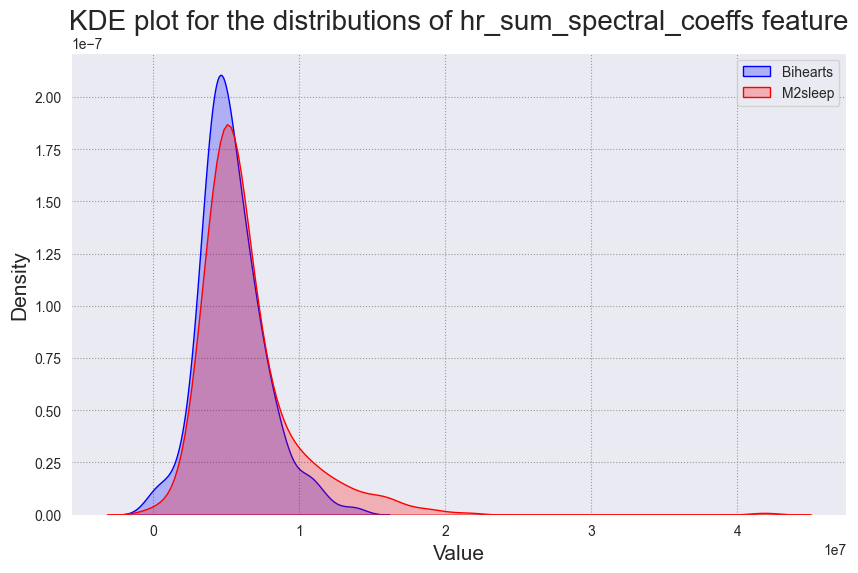

hr_entropy 0.010484380779878543


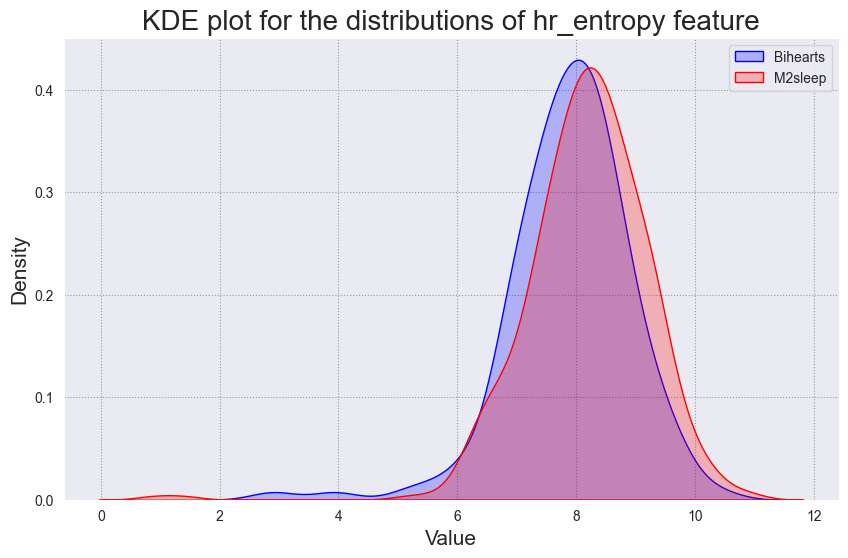

hr_energy 0.33941890539813435


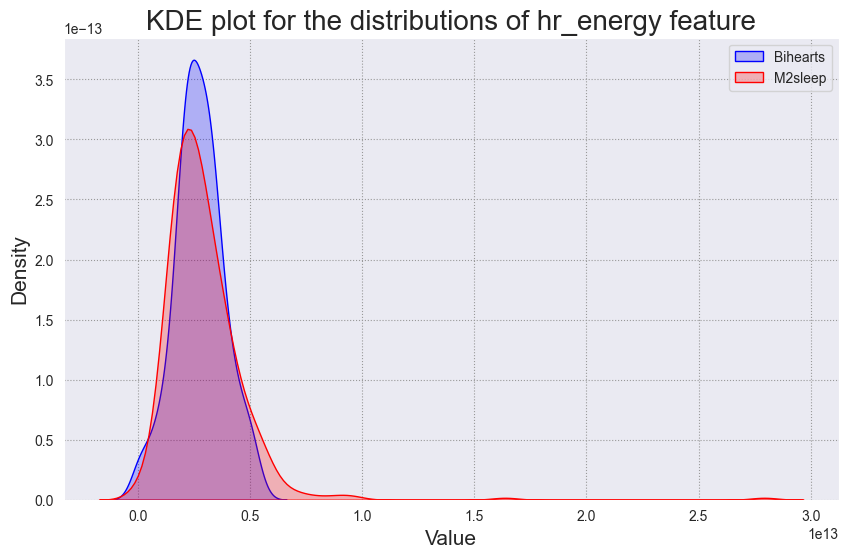

TEMP_mean 0.0019583375998730545


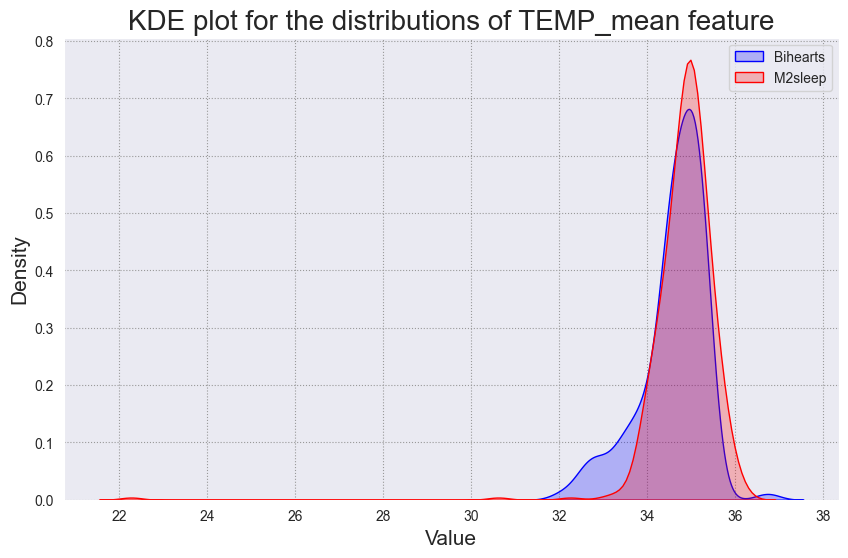

TEMP_standard_deviation 0.11051984824598055


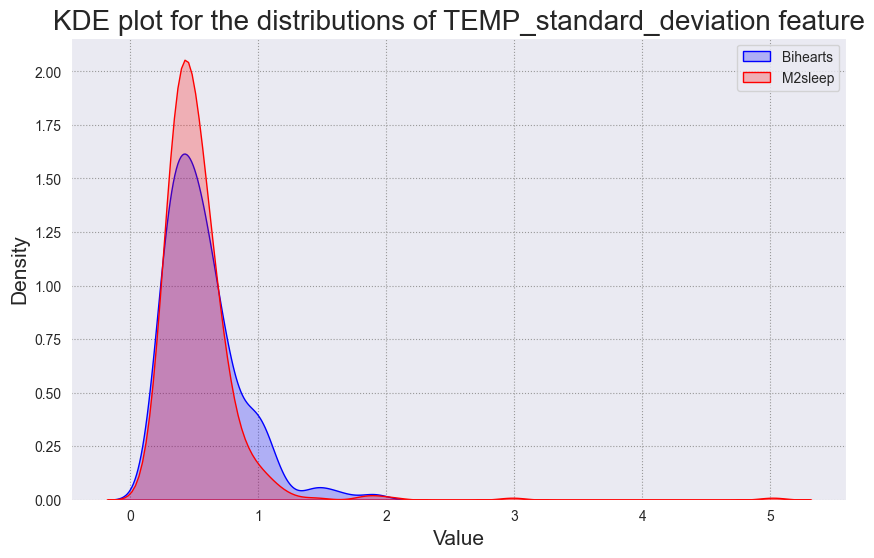

TEMP_standard_error 0.009965457228533982


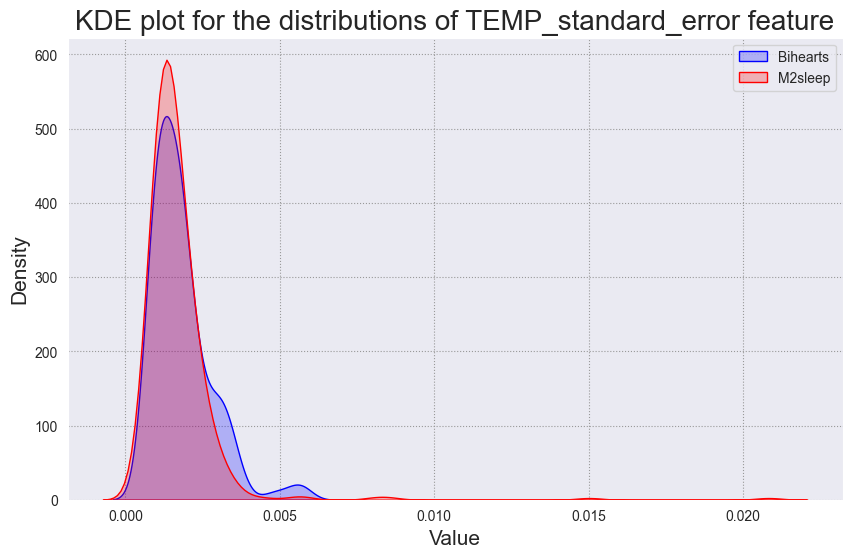

TEMP_maximum 3.875165854171733e-07


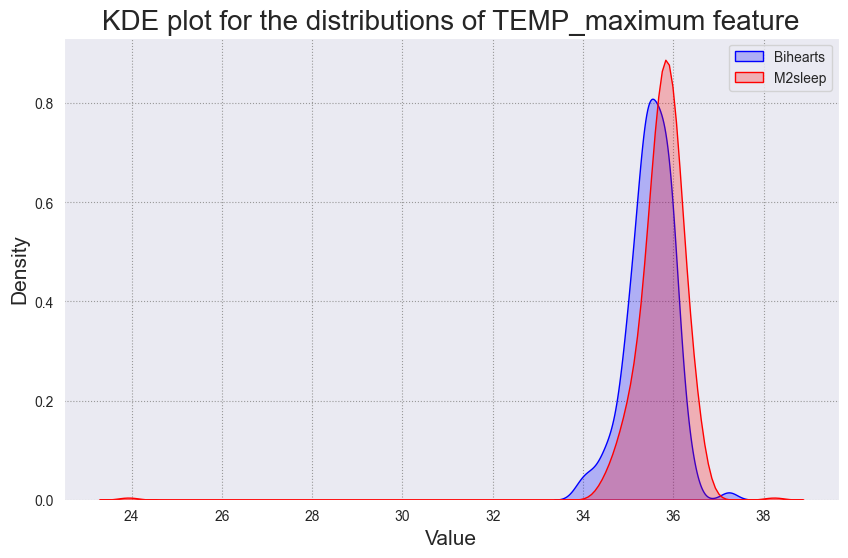

TEMP_minimum 5.537915044252602e-07


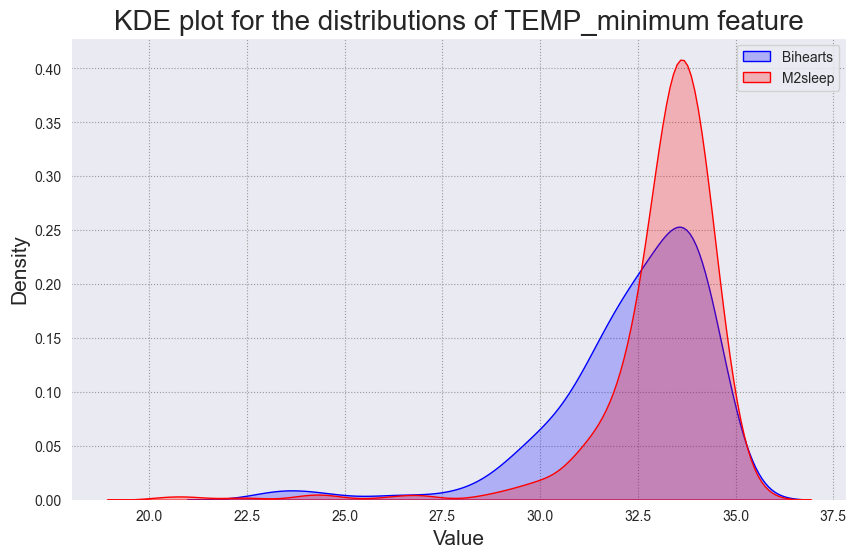

TEMP_median 0.051068729728744974


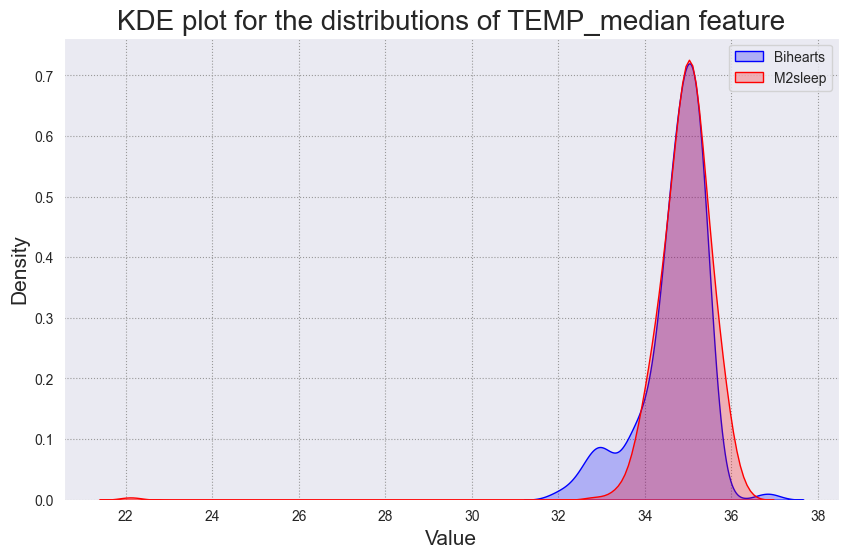

TEMP_variance 0.11051984824598055


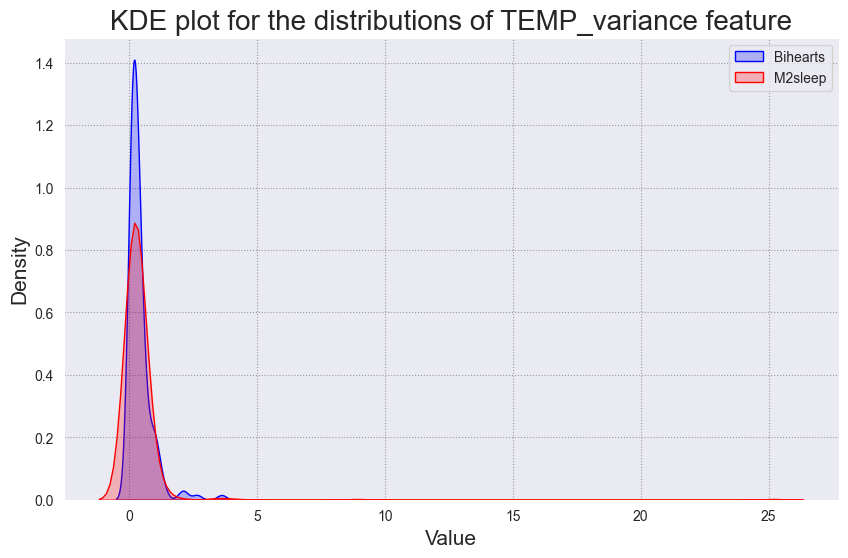

TEMP_quantile 0.002286938595682587


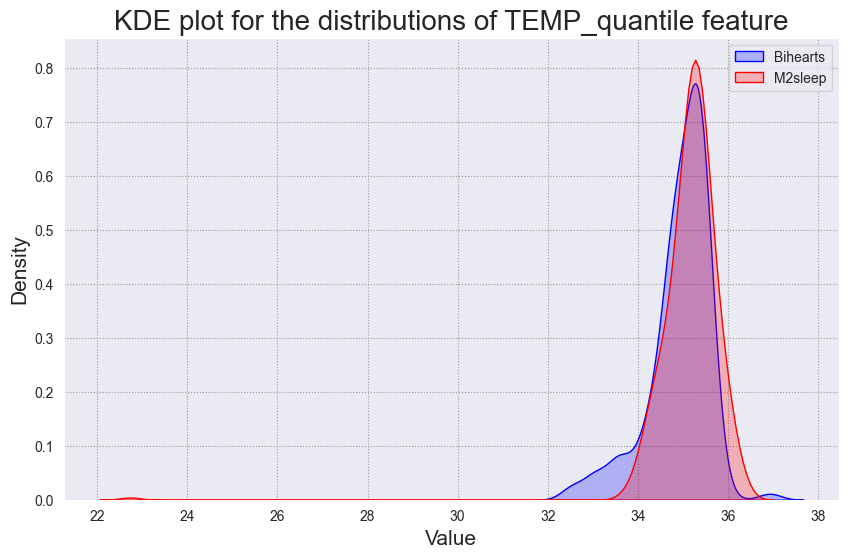

TEMP_dc_component 0.09967051506140462


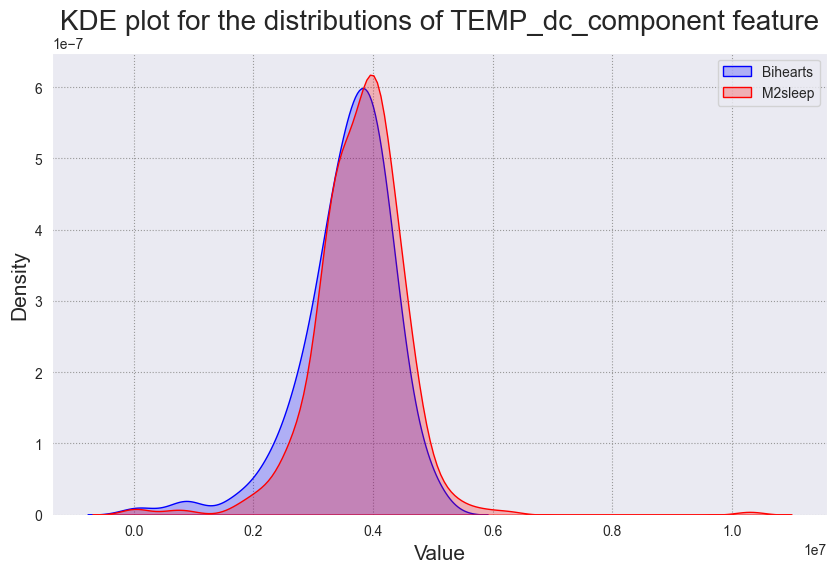

TEMP_sum_spectral_coeffs 0.8202662998940771


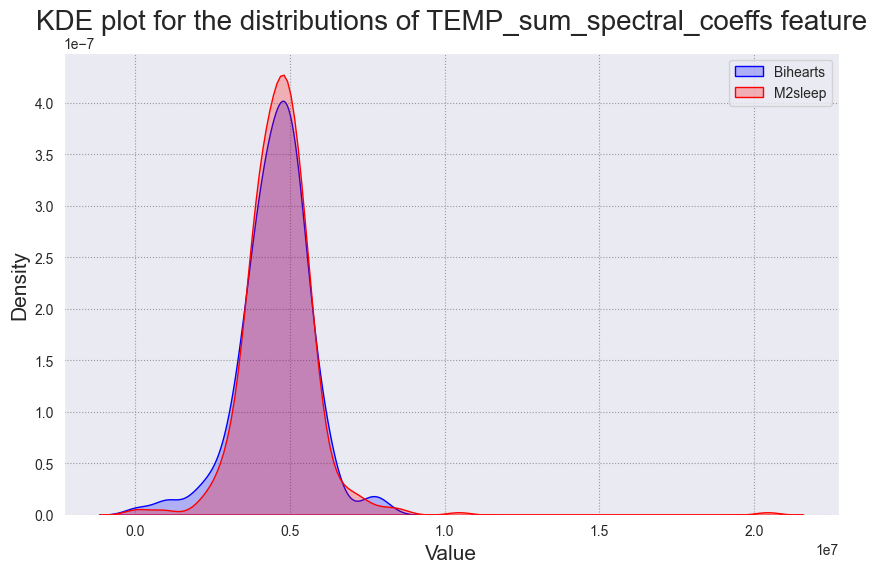

TEMP_entropy 0.003186532421559993


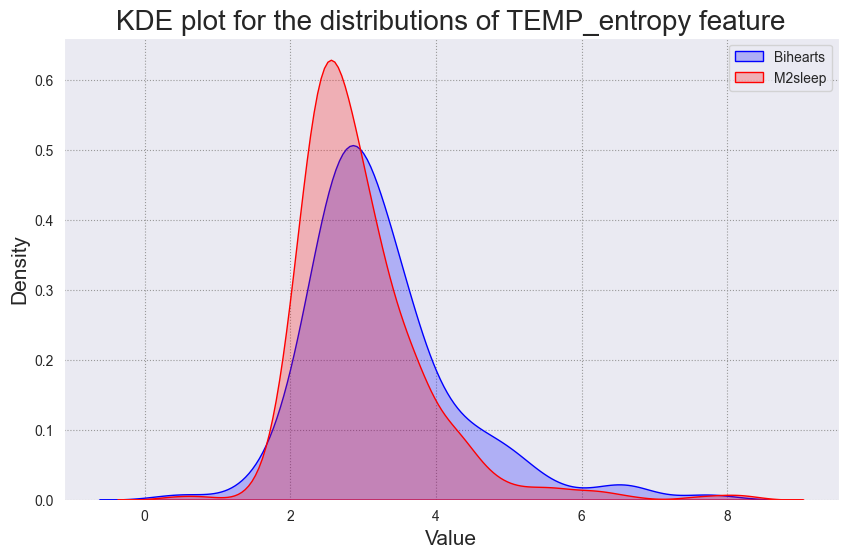

TEMP_energy 0.09967051506140462


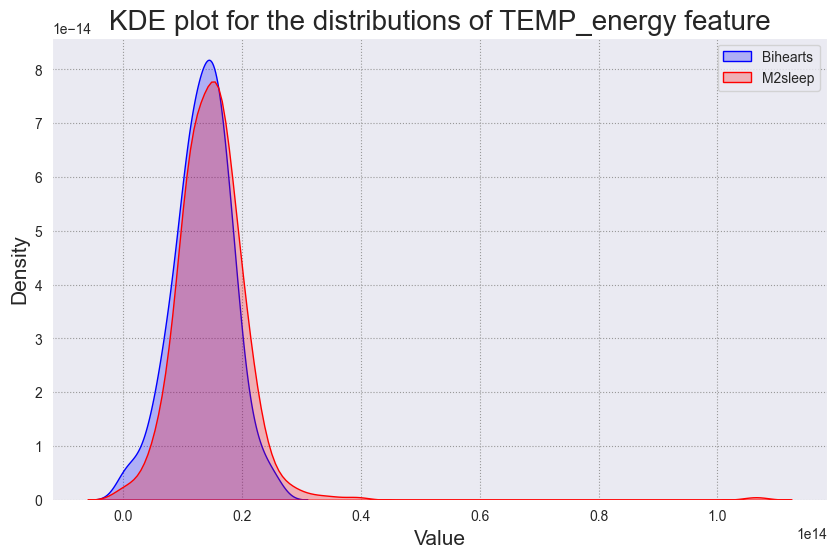

ACC_mean 0.007233983444530534


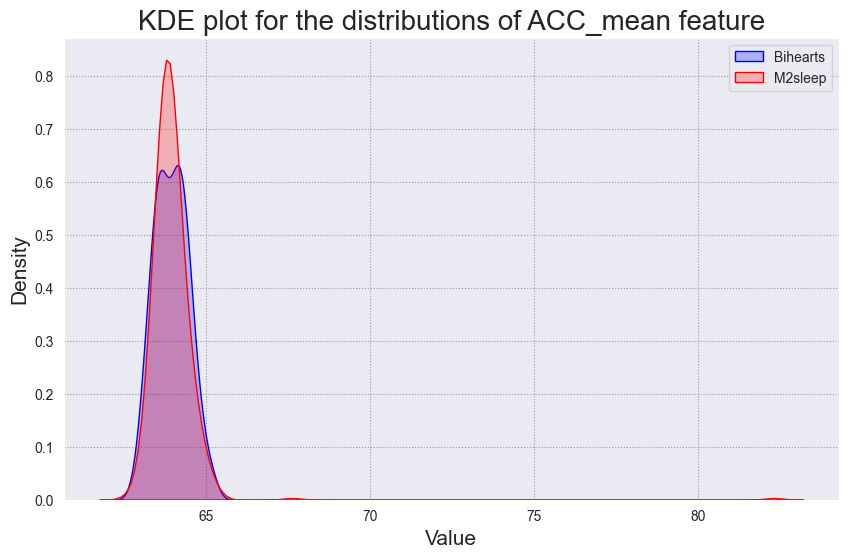

ACC_standard_deviation 0.14423008109159377


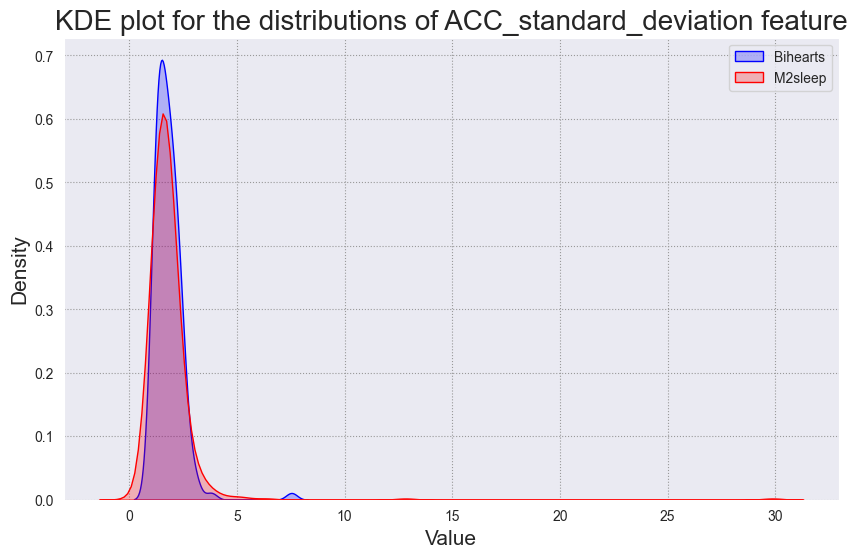

ACC_standard_error 0.04571885581079781


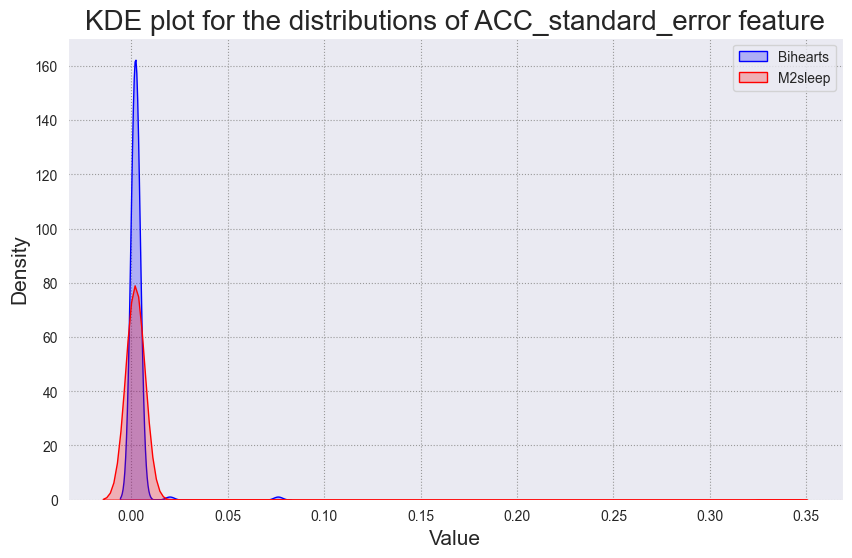

ACC_maximum 0.004873807651757439


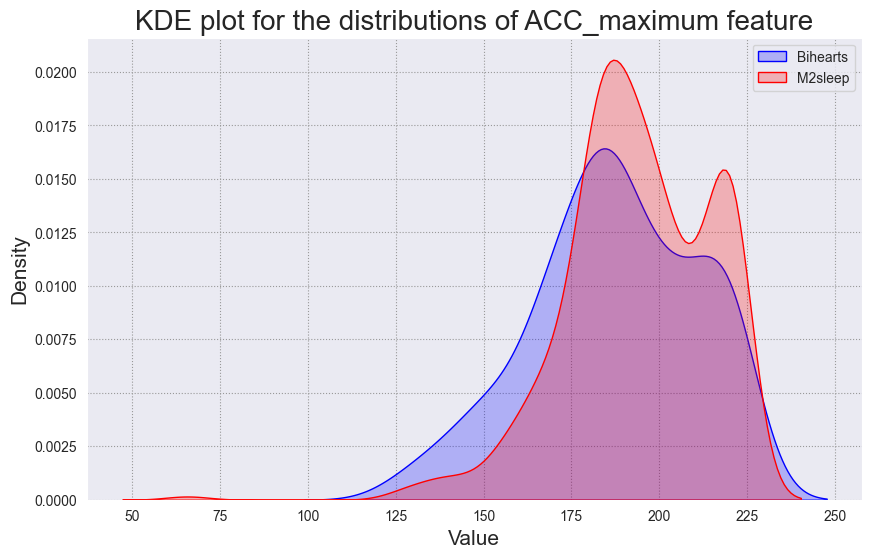

ACC_minimum 0.4842669577135429


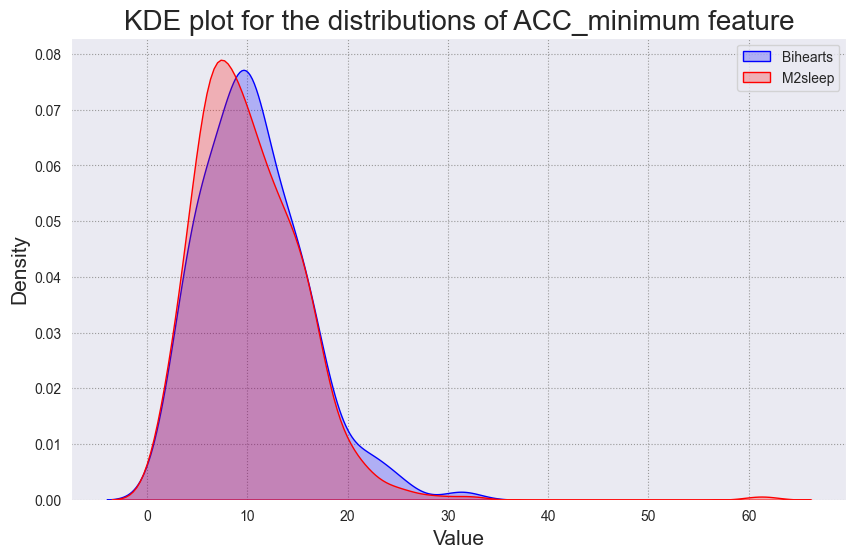

ACC_median 0.15362853215593994


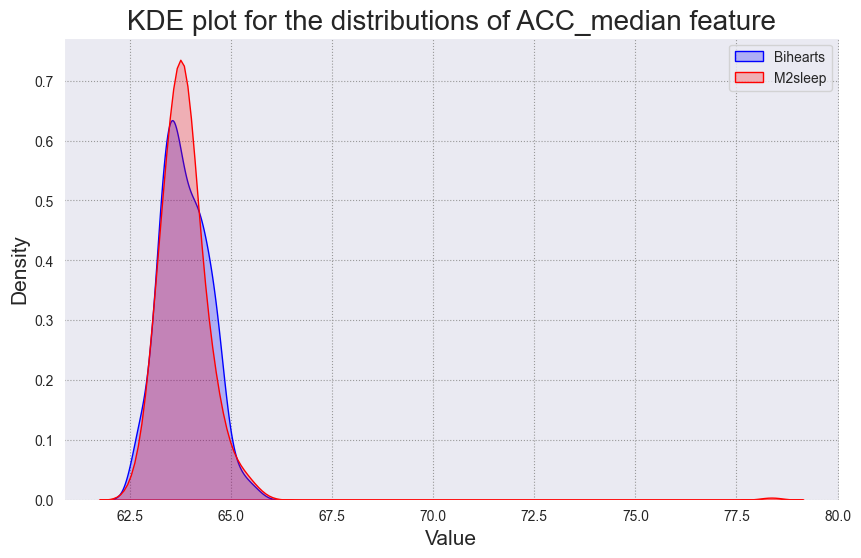

ACC_variance 0.14423008109159377


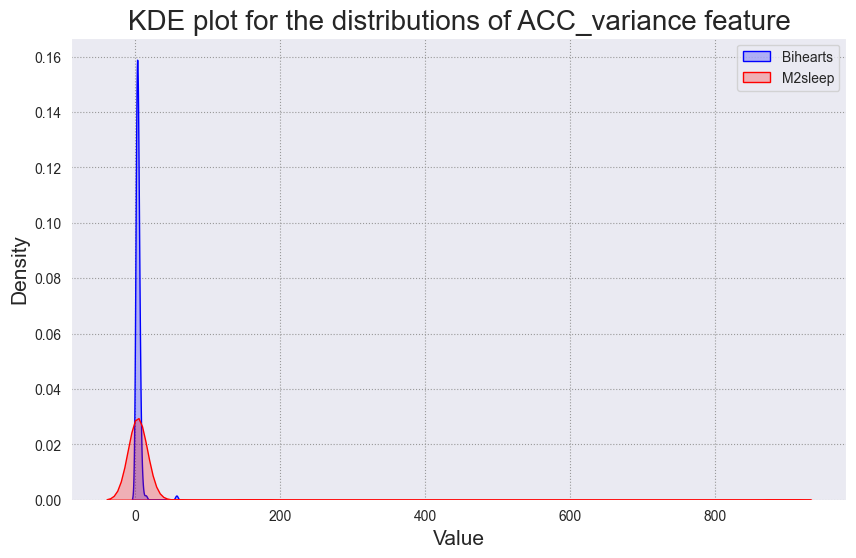

ACC_quantile 0.04227269334039094


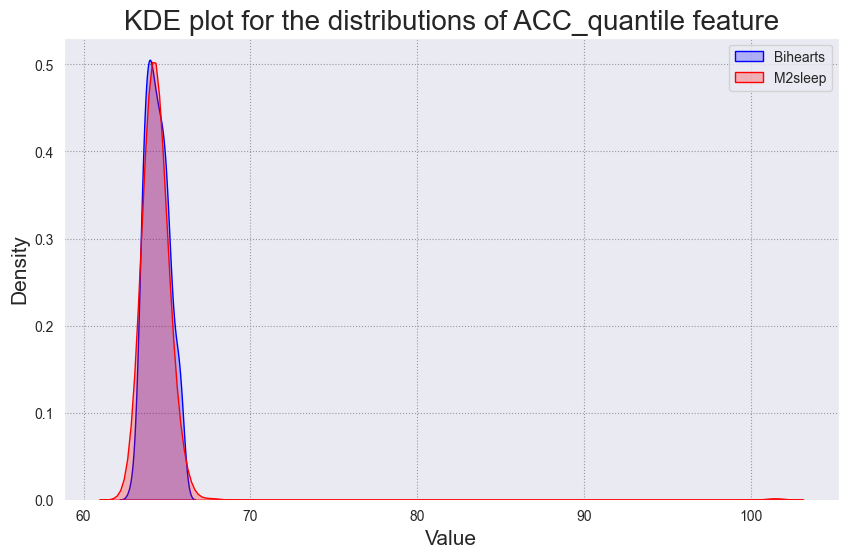

ACC_dc_component 0.2741414049132029


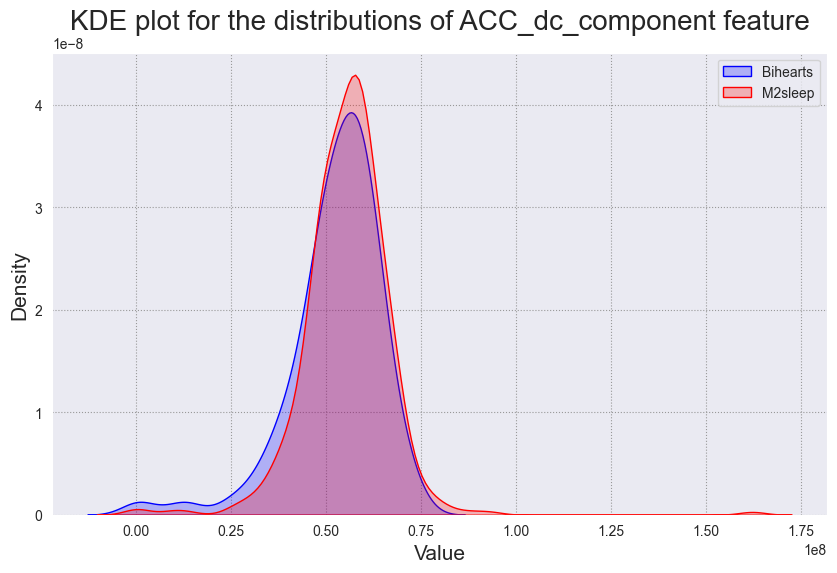

ACC_sum_spectral_coeffs 0.160032165269737


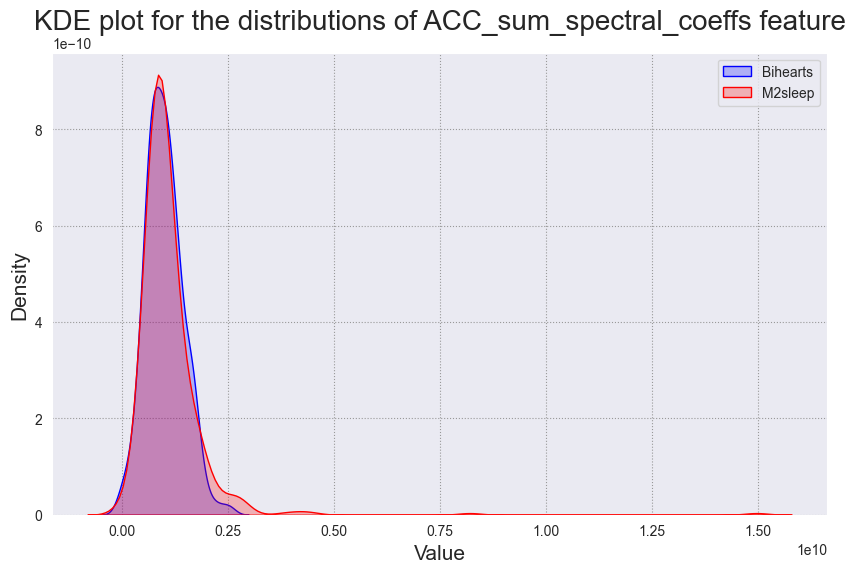

ACC_entropy 0.029285471500348593


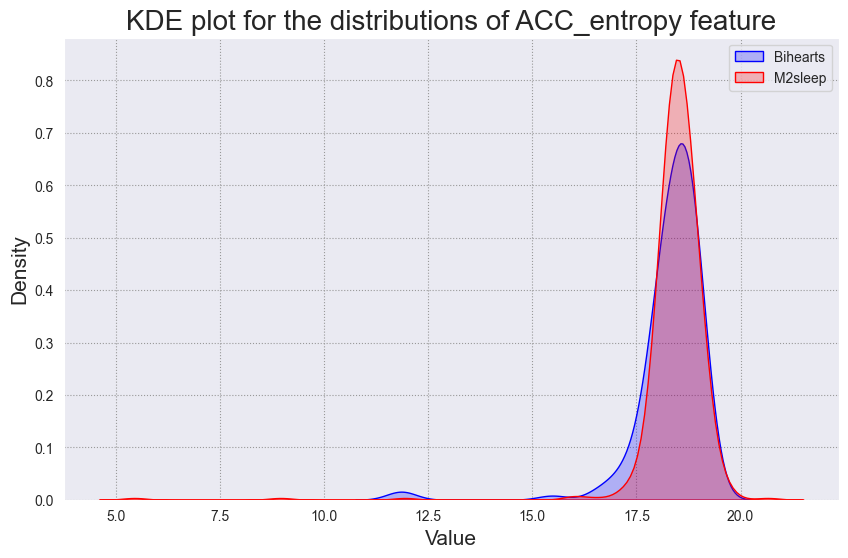

ACC_energy 0.279733024298922


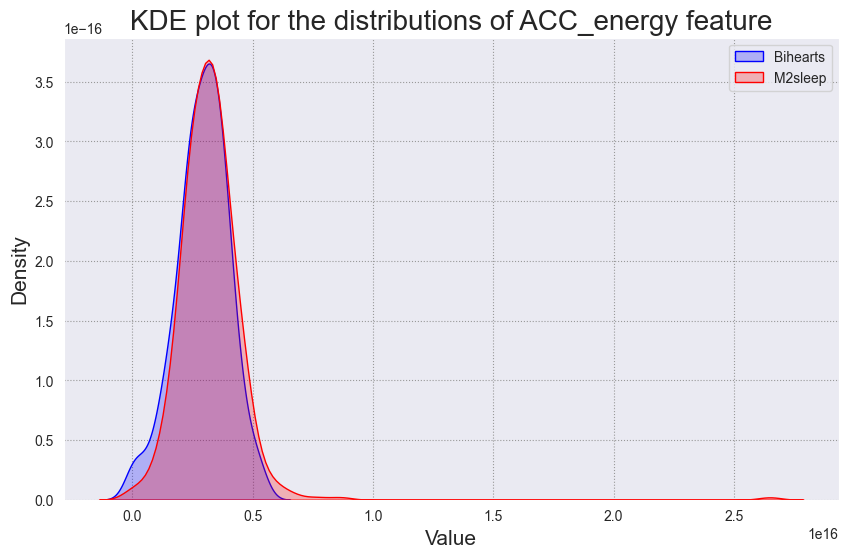

Mean_NNI 3.354259575503678e-12


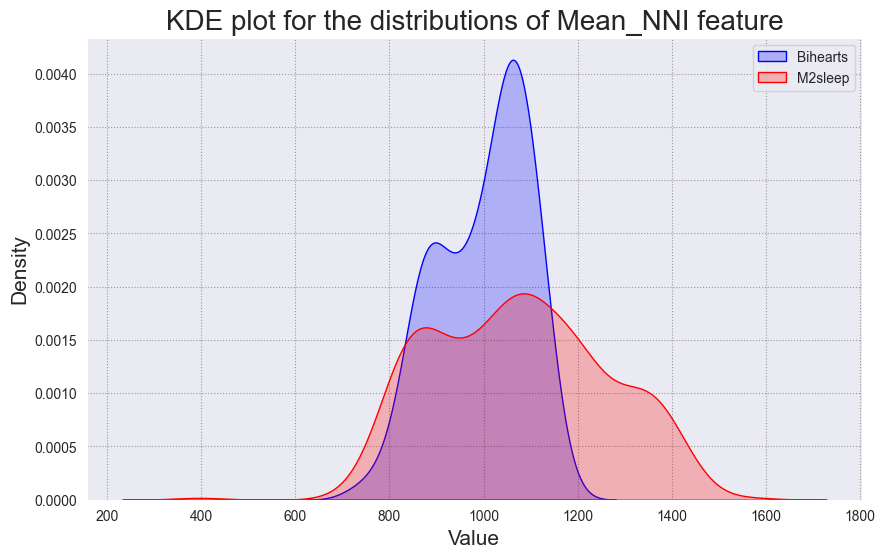

SDNN 1.2930033759968594e-07


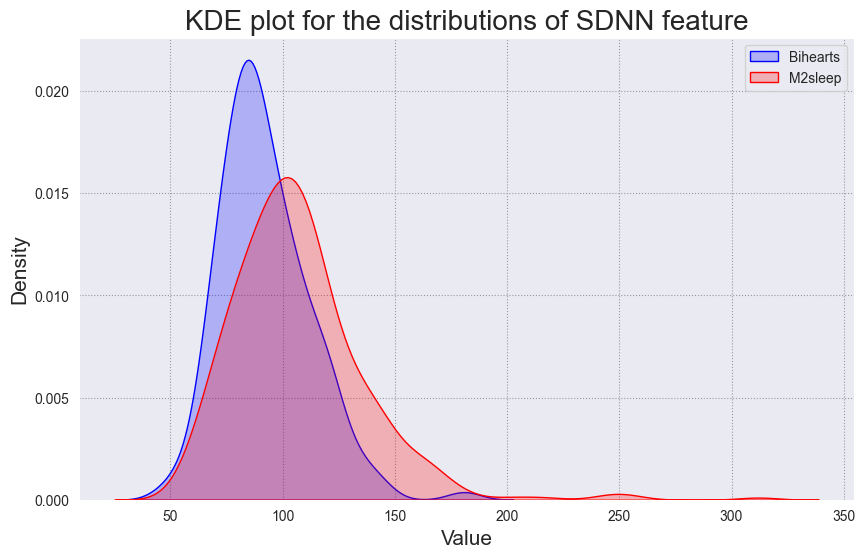

SDSD 0.00042018675721350313


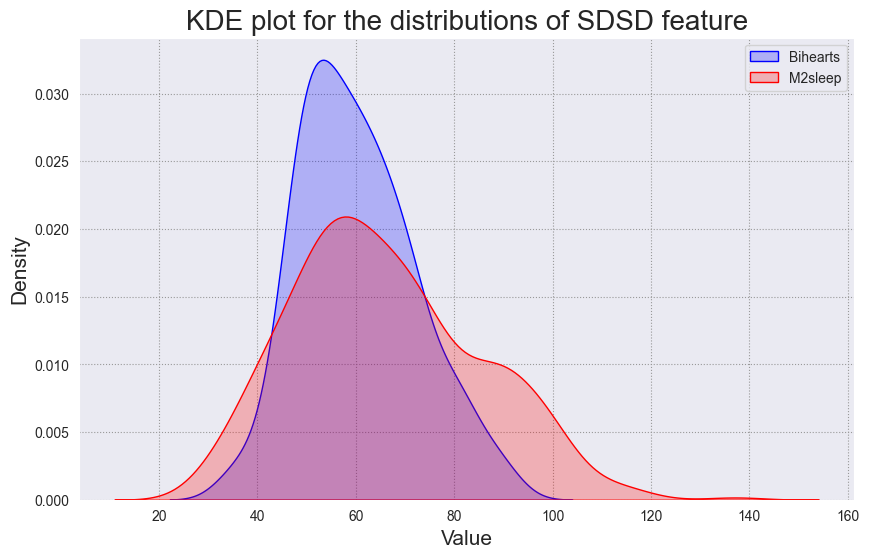

NN50 0.04140913790393471


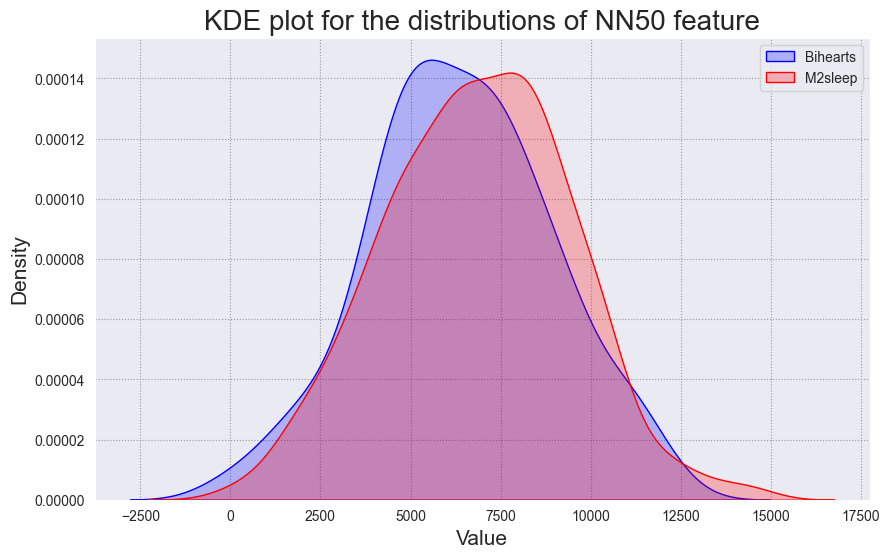

pNN50 0.0026022536300104268


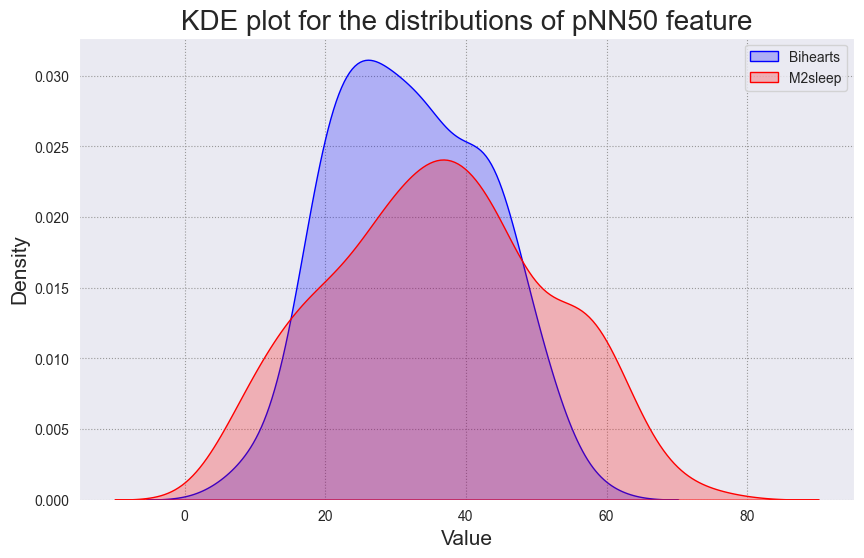

NN20 0.3619159195912545


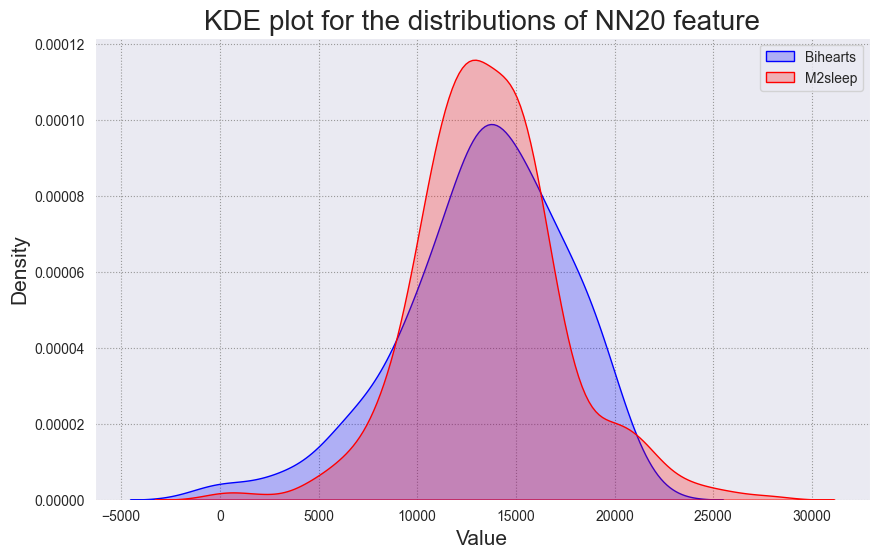

pNN20 0.001984664553351938


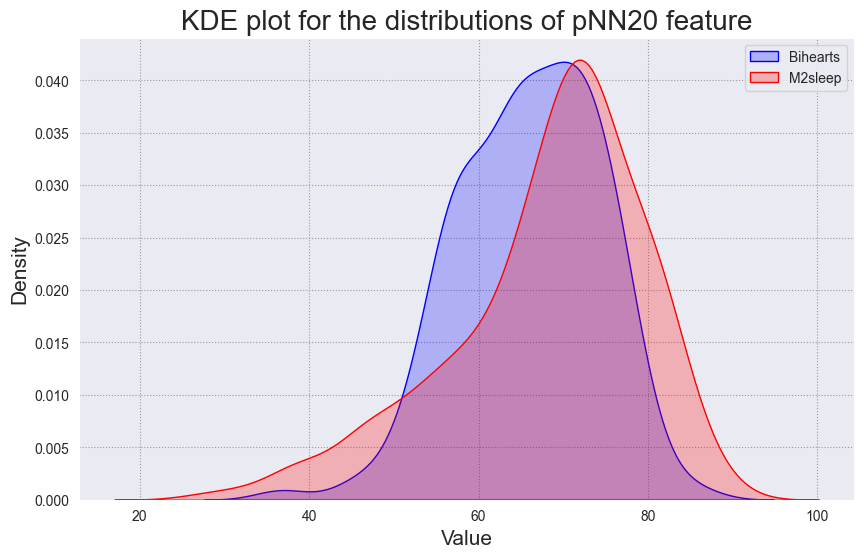

RMSSD 0.00042018675721350313


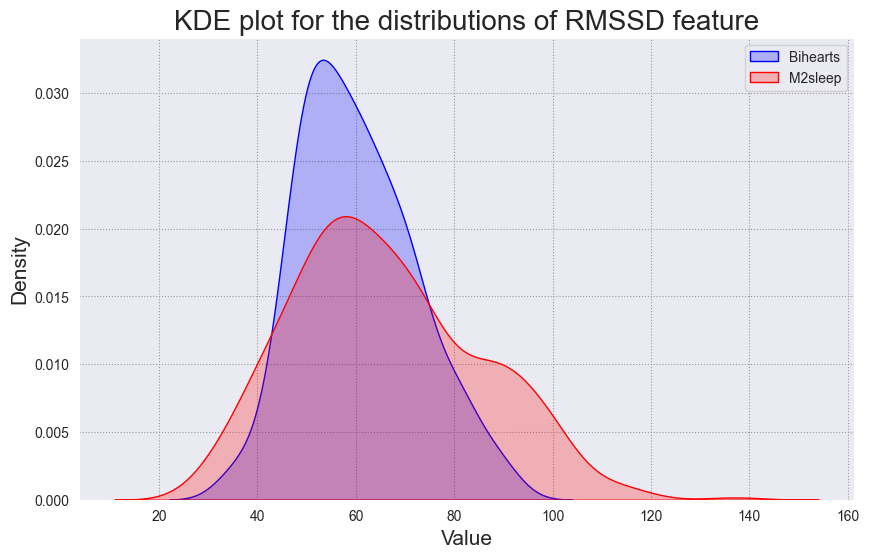

Median_NN 1.7585039602785914e-12


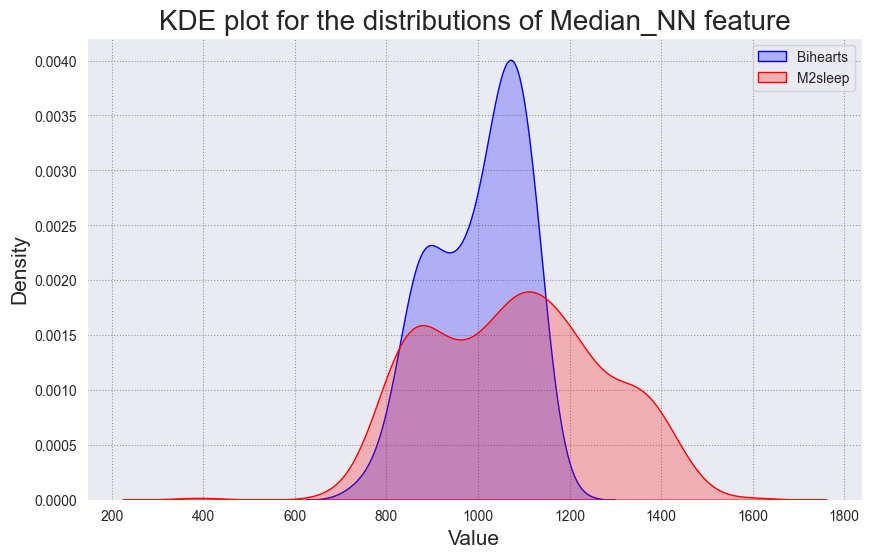

Range_NN 4.116211211088015e-05


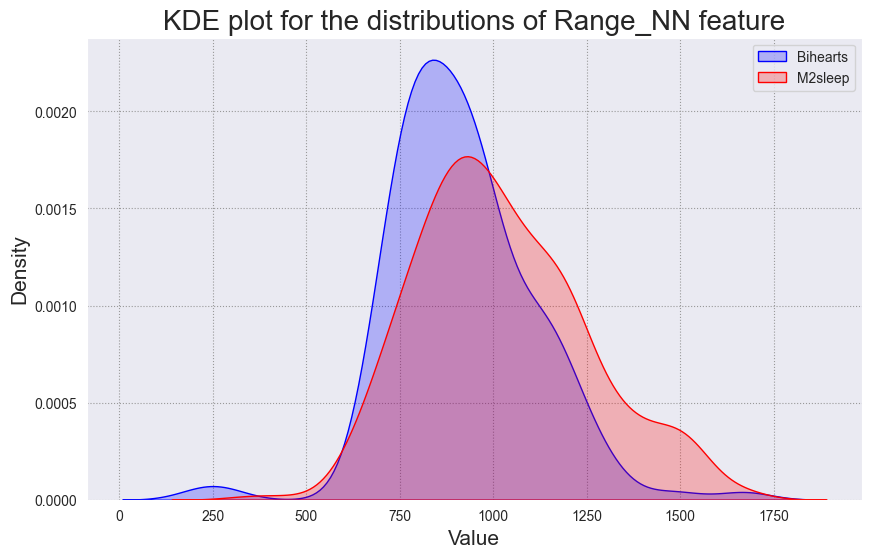

CVSD 0.21098845201978497


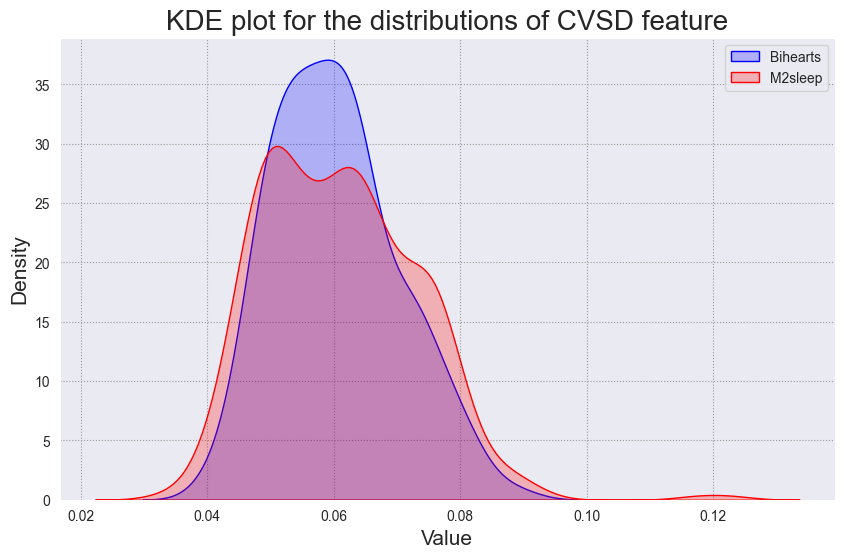

CV_NNI 0.00014487315970838552


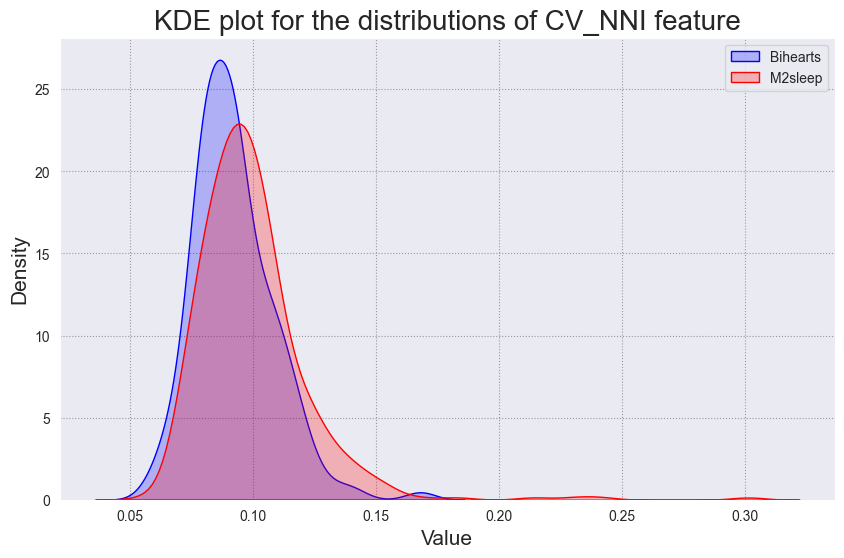

LF 0.001110041668073763


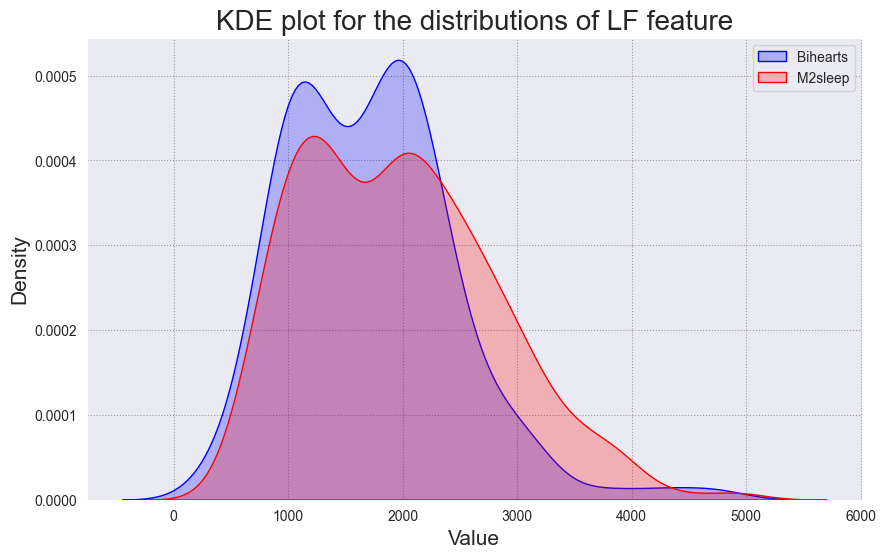

HF 0.007007172414554952


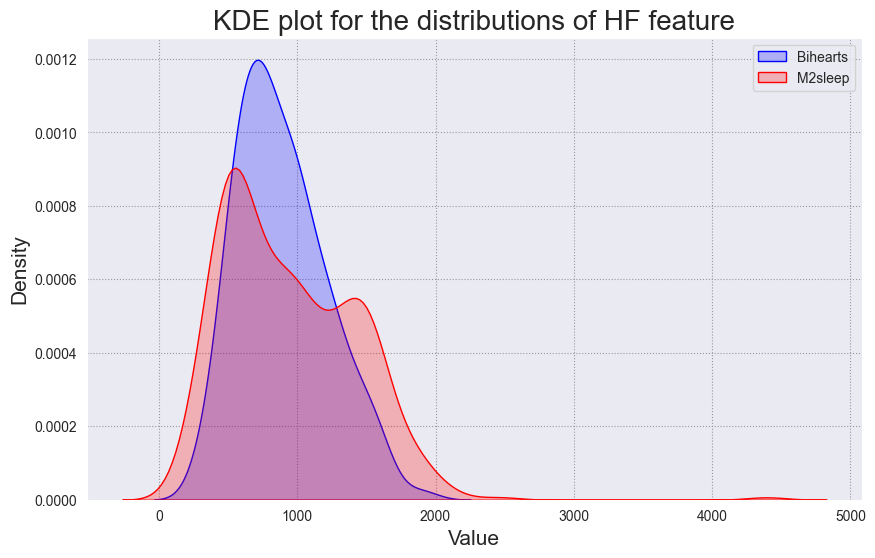

VLF 0.0001450909924385828


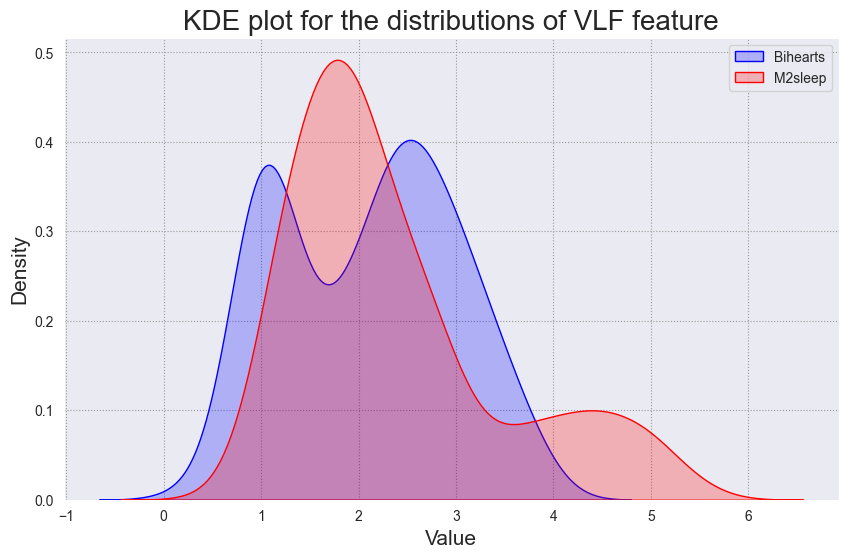

LH_HF_ratio 0.0001450909924385828


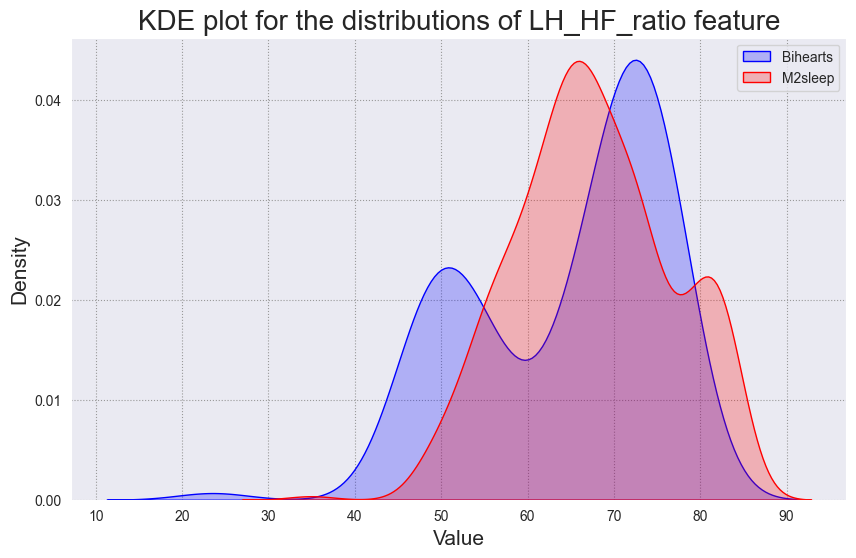

LFnu 0.0001450909924385828


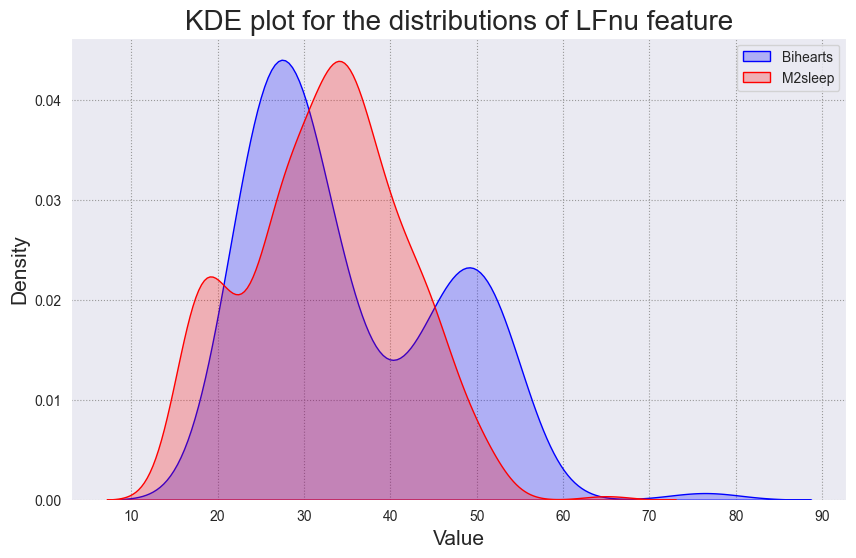

HFnu 4.2340940764162614e-08


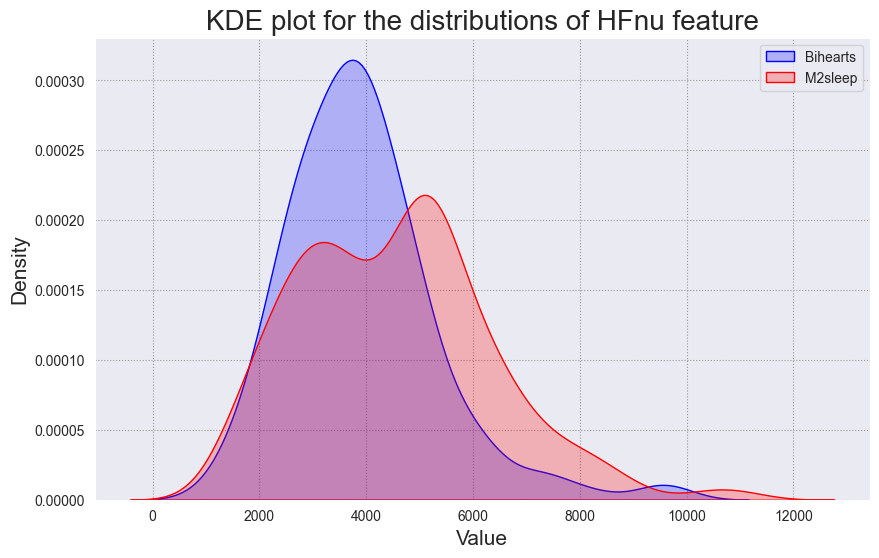

Total_Power 2.713136323845871e-09


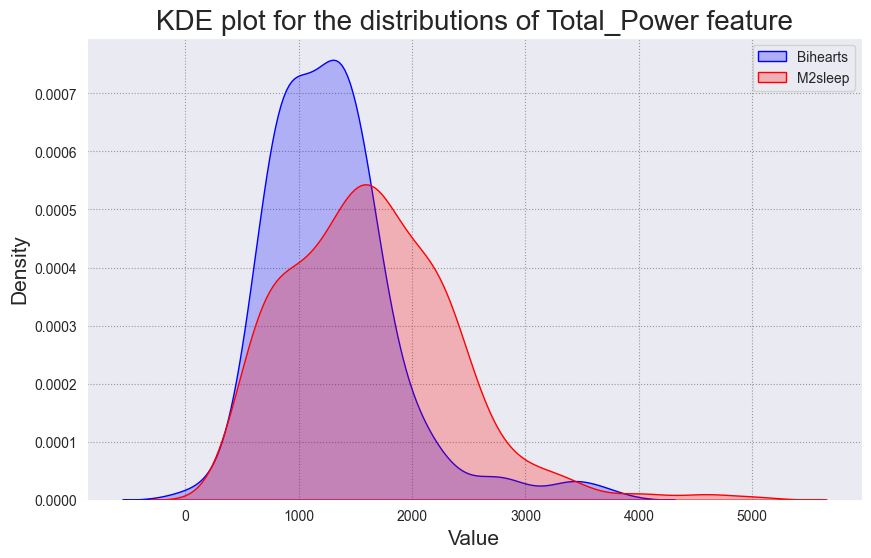

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats



for feature in features_list:
    # Sample data for three groups
    data1 = BiheartSDataset[feature]
    #data2 = HeartSDataset.extracted_features_dataframe[feature]
    data3 = M2sleepDataset[feature]

    # Perform Kolmogorov–Smirnov (KS) test to compare the means of the three distributions
    f_stat, p_value = stats.ks_2samp(data1, data3)
    
    print(feature, p_value)


    # Set the plot size
    plt.figure(figsize=(10, 6))
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    # Plot KDE for all three distributions
    sns.kdeplot(data1, color='blue', label='Bihearts', fill=True)
    #sns.kdeplot(data2, color='green', label='HeartS', fill=True)
    sns.kdeplot(data3, color='red', label='M2sleep', fill=True)

    # Add title and labels
    plt.title(f'KDE plot for the distributions of {feature} feature', fontsize=20)
    plt.xlabel('Value', fontsize=15)
    plt.ylabel('Density', fontsize=15)

    # Display the legend
    plt.legend()

    plt.savefig(f"../visualizations/features_distribution/{feature}.pdf")

    # Show the plot
    plt.show()
